<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2); line-height: 1.5;">
    <center style="color:white;font-size:35px;padding:15px"><b> ĐỒ ÁN CUỐI KỲ </b></center>
<center style="color:black;font-size:30px;padding:15px"><b> LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU</b></center>
</div>


## Import các thư viện cần thiết

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Đọc dữ liệu từ CSV
df = pd.read_csv('../Data/who_life_exp.csv')
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


## Tiền xử lí + phân tích dữ liệu để trả lời câu hỏi


### Câu 1: Mức độ tương quan của các yếu tố ảnh hưởng đối với tuổi thọ trung bình là như thế nào?

- Tạo 1 list chứa tên các cột không ảnh hưởng tới tuổi thọ trung bình và tạo 1 dataframe mới từ **df** không chứa các cột đó
- Dùng hàm corr() để tính ma trận tương quan của từng cặp cột. Sau đó lấy ra các hệ số tương quan của các cột ảnh hưởng đối với cột "life_expect" 

In [3]:
# Lấy ra các cột không ảnh hưởng tới tuổi thọ trung bình
columns_to_exclude = ['country', 'country_code', 'region', 'year', 'life_exp60', 'adult_mortality', 'infant_mort', 'age1-4mort', 'une_infant', 'une_life', 'une_literacy', 'une_school', 'gni_capita', 'une_edu_spend']

# Loại bỏ các cột đã được chọn
selected_df = df.drop(columns=columns_to_exclude)

# Chuyển kiểu dữ liệu qua numeric
selected_df = selected_df.apply(pd.to_numeric, errors='coerce')

# Tính toán ma trận tương quan với cột 'life_expect'
correlation_life_expect = selected_df.corr()['life_expect'].sort_values(ascending=False).drop('life_expect')
correlation_life_expect

basic_water        0.831099
doctors            0.651891
polio              0.646486
diphtheria         0.640473
measles            0.640408
age5-19obesity     0.621000
gghe-d             0.609787
une_gni            0.603019
bmi                0.597996
alcohol            0.399797
hepatitis          0.341137
che_gdp            0.284920
une_pop            0.032126
hospitals         -0.050087
une_hiv           -0.511821
age5-19thinness   -0.565396
une_poverty       -0.776992
Name: life_expect, dtype: float64

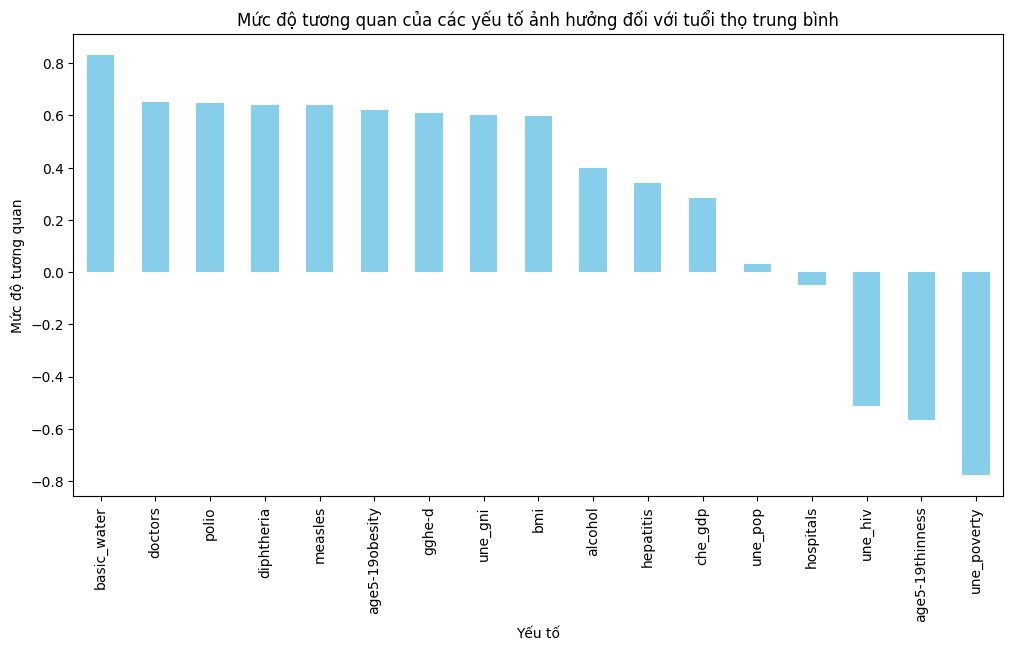

In [4]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
correlation_life_expect.plot(kind='bar', color='skyblue')
plt.title('Mức độ tương quan của các yếu tố ảnh hưởng đối với tuổi thọ trung bình')
plt.xlabel('Yếu tố')
plt.ylabel('Mức độ tương quan')
plt.show()

Kết quả thu được cho thấy:
- Yếu tố "basic_water" (tỷ lệ dân số sử dụng các loại nước uống cơ bản) có ảnh hưởng lớn nhất đến tuổi thọ trung bình. Điều đó càng cho thấy rõ hơn các loại nước uống cơ bản là một phần không thể thiếu trong việc duy trì một sức khỏe tốt.
- Tiếp đến là tỉ lệ bác sĩ, tỉ lệ tiêm các loại vaccine (polio, diphtheria, measles), từ đó cho thấy được tầm quan trọng của công tác y tế nói chung và việc tiêm ngừa đối với các loại dịch bệnh nói riêng, các quốc gia cần tuyên truyền, kêu gọi người dân tiêm đủ các loại vaccine, vì an toàn cho bản thân và tránh trở thành gánh nặng cho gia đình, đất nước.
- Các yếu tố về kinh tế ("gghe-d": chi tiêu chung cho y tế của chính phủ trong nước, "une_gni": GNI bình quân đầu người) cũng có mối tương quan lớn đối với tuổi trọ trung bình. Các quốc gia có nền kinh tế phát triển, đầu tư, chi tiêu nhiều vào y tế thì sức khỏe, tinh thần của người dân sẽ ổn định, và từ đó càng thúc đẩy kinh tế đất nước đi lên.

### Câu 2: Tuổi thọ trung bình của 5 quốc gia có GDP bình quân đầu người cao nhất châu Á trong 10 năm gần đây thay đổi như thế nào?

- Nhóm dữ liệu theo 'country', tính GNI bình quân đầu người và chọn ra 5 quốc gia có GNI cao nhất. Lấy chỉ mục (tên quốc gia) của các quốc gia này.
- Lọc DataFrame để chỉ bao gồm các dòng tương ứng với 5 quốc gia hàng đầu đã chọn.
- Lọc DataFrame để chỉ bao gồm dữ liệu trong 10 năm gần đây, sử dụng năm lớn nhất trừ đi 9 để có khoảng thời gian mong muốn.
- Tạo một biểu đồ đường sử dụng Matplotlib với mỗi quốc gia được đại diện bằng một đường và điểm dữ liệu trên biểu đồ. Chú thích (legend) hiển thị tên của mỗi quốc gia. Các trục được đặt tên là 'Năm' và 'Tuổi thọ trung bình', và tiêu đề của biểu đồ là "So sánh tuổi thọ của 5 quốc gia có thu nhập quốc dân cao nhất châu Á trong 10 năm qua".

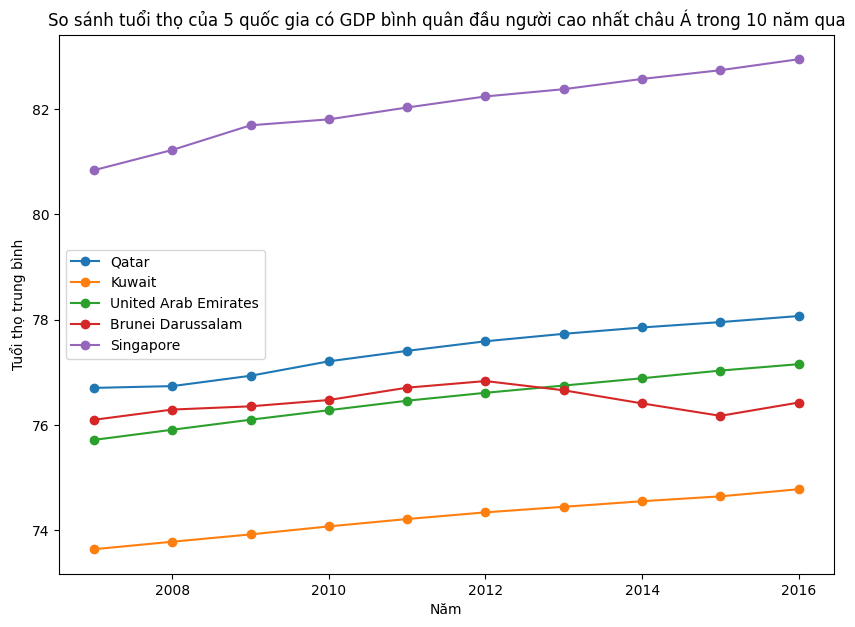

In [13]:
# Chọn các quốc gia có GDP bình quân đầu người cao nhất
top_countries = df.groupby('country')['gni_capita'].mean().nlargest(5).index

# Lọc dữ liệu cho 5 quốc gia này
filtered_df = df[df['country'].isin(top_countries)]

# Lọc theo 10 năm gần đây
recent_10_years = filtered_df[filtered_df['year'] >= df['year'].max() - 9]

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 7))

for country in top_countries:
    country_data = recent_10_years[recent_10_years['country'] == country]
    plt.plot(country_data['year'], country_data['life_expect'], label=country, marker='o')

plt.xlabel('Năm')
plt.ylabel('Tuổi thọ trung bình')
plt.title('So sánh tuổi thọ của 5 quốc gia có GDP bình quân đầu người cao nhất châu Á trong 10 năm qua')
plt.legend()
plt.show()

- Dựa vào biểu đồ ta có một số kết luận sau:
    - Nhìn chung, tuổi thọ trung bình ở 5 quốc gia có thu nhập cao nhất châu Á đều tăng dần trong 10 năm gần đây. Điều này cho thấy chất lượng cuộc sống và hệ thống y tế ở các nước này đã được cải thiện đáng kể.
    - Singapore là quốc gia có tuổi thọ trung bình cao nhất trong số 5 nước, và cũng có xu hướng tăng ổn định qua các năm. Tuổi thọ trung bình của Singapore tăng từ gần 81 tuổi lên hơn 83 tuổi.
    - Qatar có xu hướng tăng tuổi thọ trung bình tương đối ổn định, từ khoảng gần 77 tuổi lên gần 79 tuổi trong 10 năm gần đây. Mức tăng này thấp hơn Singapore.
    - Ở những năm đầu, tuổi thọ trung bình của UAE thấp hơn Brunei, nhưng về sau thì đã cao hơn vì xu hướng tuổi thọ tăng đều qua các năm.
    - Brunei có tuổi thọ trung bình tăng chậm nhất trong 5 nước, chỉ dao động trong khoảng 76 - 77 tuổi. Lí do là xu hướng tăng không đều, có những năm tăng mạnh nhưng cũng có những năm giảm.
    - Tương tự như UAE, Kuwait có xu hướng tăng tuổi thọ đều qua các năm. Nhưng có tuổi thọ trung bình thấp nhất trong 5 nước, chỉ dao động ở quanh mức 73-75 tuổi.
- Biểu đồ cho thấy tuổi thọ trung bình ở các nước thu nhập cao nhất châu Á có xu hướng tăng dần trong 10 năm gần đây, trong đó Singapore nước có tốc độ tăng tuổi thọ nhanh nhất.

### Câu 3: Các yếu tố về giáo dục ảnh hưởng đến tuổi thọ trung bình ở các quốc gia như thế nào? Liệu sự thay đổi về tỉ lệ biết chữ ở các quốc gia có ảnh hưởng đến sự thay đổi về tuổi thọ trung bình hay không, vì sao?

Để trả lời câu hỏi trên ta thực hiện các bước sau:
- Chọn các cột cần thiết để phân tích dữ liệu (các cột về giáo dục) và bỏ đi các giá trị trống
- Vé biểu đồ pair plot cho sự tương quan giữa các bộ dữ liệu
- Tính hệ số tương quan và vẽ heatmap

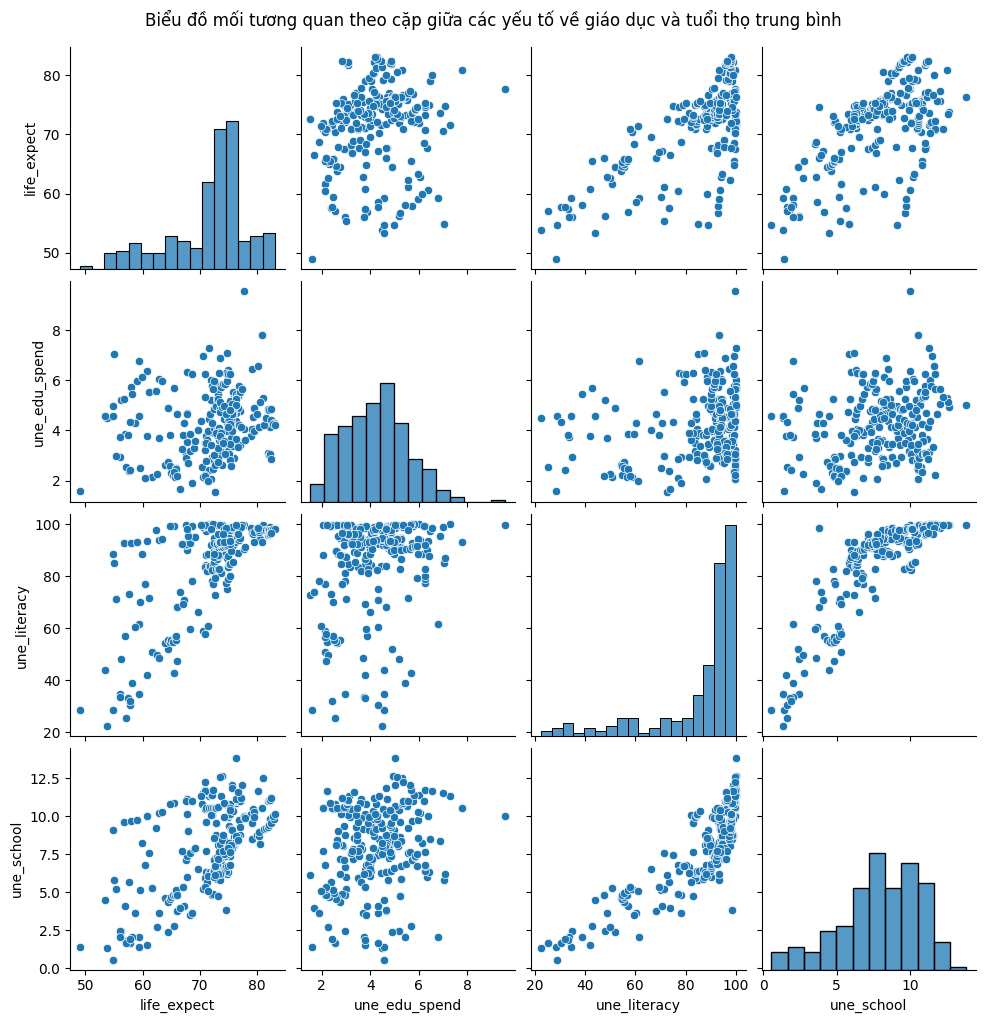

In [6]:
import warnings

# Tắt tất cả các cảnh báo
warnings.filterwarnings("ignore")

# Chọn các cột cần thiết
selected_columns = ['country', 'year', 'life_expect', 'une_edu_spend', 'une_literacy', 'une_school']

# Tạo DataFrame mới với các cột đã chọn và loại bỏ dòng có giá trị thiếu
df_selected = df[selected_columns].dropna()

# Vẽ biểu đồ scatterplot cho mối tương quan
sns.pairplot(df_selected, vars=['life_expect', 'une_edu_spend', 'une_literacy', 'une_school'])
plt.suptitle('Biểu đồ mối tương quan theo cặp giữa các yếu tố về giáo dục và tuổi thọ trung bình', y=1.02)
plt.show()

Từ biểu đồ trên ta rút ra những nhận xét sau:
- Tỉ lệ người biết chữ và số năm đi học trung bình của người trên 25 tuổi có ảnh hưởng đến tuổi thọ trung bình
- Tỉ lệ đầu tư cho giáo dục có độ tương quan không cao với tuổi thọ trung bình
- Ta thấy tỉ lệ người biết chữ càng cao thì tuổi thọ trung bình càng cao


Vậy liệu ở các quốc gia các giả định này có đúng hay đây chỉ là kết quả chung cho bộ dữ liệu. Để kiểm chứng ta sẽ xem xét sự thay đổi của tuổi thọ trung bình ở 20 quốc gia có tỉ lệ người biết chữ cao nhất

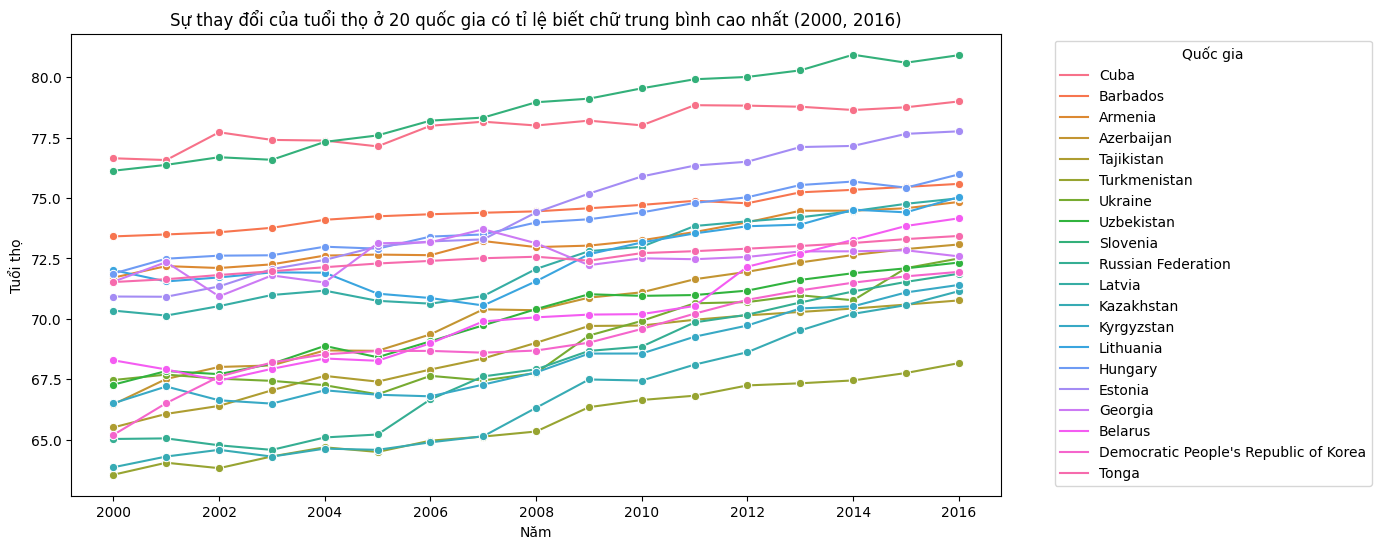

In [7]:
# Chọn các cột cần thiết
selected_columns = ['country', 'year', 'life_expect', 'une_literacy']

# Lấy 20 quốc gia có tỉ lệ biết chữ trung bình cao nhất
top_20_countries = df.groupby('country')['une_literacy'].mean().nlargest(20).index

# Lọc dữ liệu cho 20 quốc gia đó
df_top_countries = df[df['country'].isin(top_20_countries)]

# Chia dữ liệu thành các khoảng 4 năm
df_top_countries['year_interval'] = pd.cut(df_top_countries['year'], bins=range(2000, 2016, 4), right=False)

# Vẽ biểu đồ lineplot cho sự thay đổi tuổi thọ theo năm
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='life_expect', hue='country', data=df_top_countries, marker='o')
plt.title('Sự thay đổi của tuổi thọ ở 20 quốc gia có tỉ lệ biết chữ trung bình cao nhất (2000, 2016)')
plt.xlabel('Năm')
plt.ylabel('Tuổi thọ')
plt.legend(title='Quốc gia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Từ biểu đồ trên ta rút ra:
- Ở các quốc gia có tỉ lệ biết chữ cao thì tuổi thọ tăng theo thời gian
- Vậy có thể kết luận tỉ lệ biết chữ ảnh hưởng đến sự thay đổi của tuổi thọ trung bình

### Câu 4: Trong năm 2016, tỉ lệ dân số sử dụng các loại nước uống cơ bản của 5 quốc gia có tỉ lệ thấp nhất vào năm 2000 thay đổi như thế nào?

Tỉ lệ tăng trưởng của việc sử dụng nước uống trong giao đoạn 2000 - 2016 của các quốc gia được tính theo công thức: (tỉ lệ năm 2016 - tỉ lệ năm 2000) / tỉ lệ năm 2000 * 100%. Tính dataframe water_df gồm 3 cột (tên là "water_2000", "water_2016", "growth_rate") ứng với tỉ lệ năm 2000, tỉ lệ năm 2016 và tỉ lệ tăng trưởng của việc sử dụng các loại nước uống cơ bản trong giai đoạn này; index là tên các quốc gia. Sắp xếp theo thứ tự giảm dần của tỉ lệ tăng trưởng, sau đó dùng head(5) để in ra top 5 các quốc gia có sự thay đổi (tăng trưởng) lớn nhất.

In [8]:
water_df = pd.DataFrame()
water_df['country'] = df['country'].unique()

water_2000 = df[df['year']==2000]['basic_water'].array
water_2016 = df[df['year']==2016]['basic_water'].array
water_df['water_2000'] = water_2000
water_df['water_2016'] = water_2016
water_df.sort_values(by='water_2000', inplace=True)
water_df['growth_rate'] = (water_df['water_2016'] - water_df['water_2000']) / water_df['water_2000'] * 100
water_df.set_index('country', inplace=True)
water_df.head(5)

,water_2000,water_2016,growth_rate
country,,,
Ethiopia,18.69521,40.04142,114.180103
Somalia,19.60301,50.81511,159.220956
Mozambique,19.89657,53.44394,168.608810
Uganda,26.75162,47.66563,78.178480
United Republic of Tanzania,27.25082,54.84754,101.269320


Từ kết quả ở trên, ta tiến hành vẽ biểu đồ cột (2 cột ứng với tỉ lệ năm 2000 và năm 2016) cho thấy được sự thay đổi về tỉ lệ dân số sử dụng các loại nước uống cơ bản của top 5 quốc gia có sự tăng trưởng lớn nhất, trong đó trục hoành là quốc gia, trục tung là tỉ lệ sử dụng.

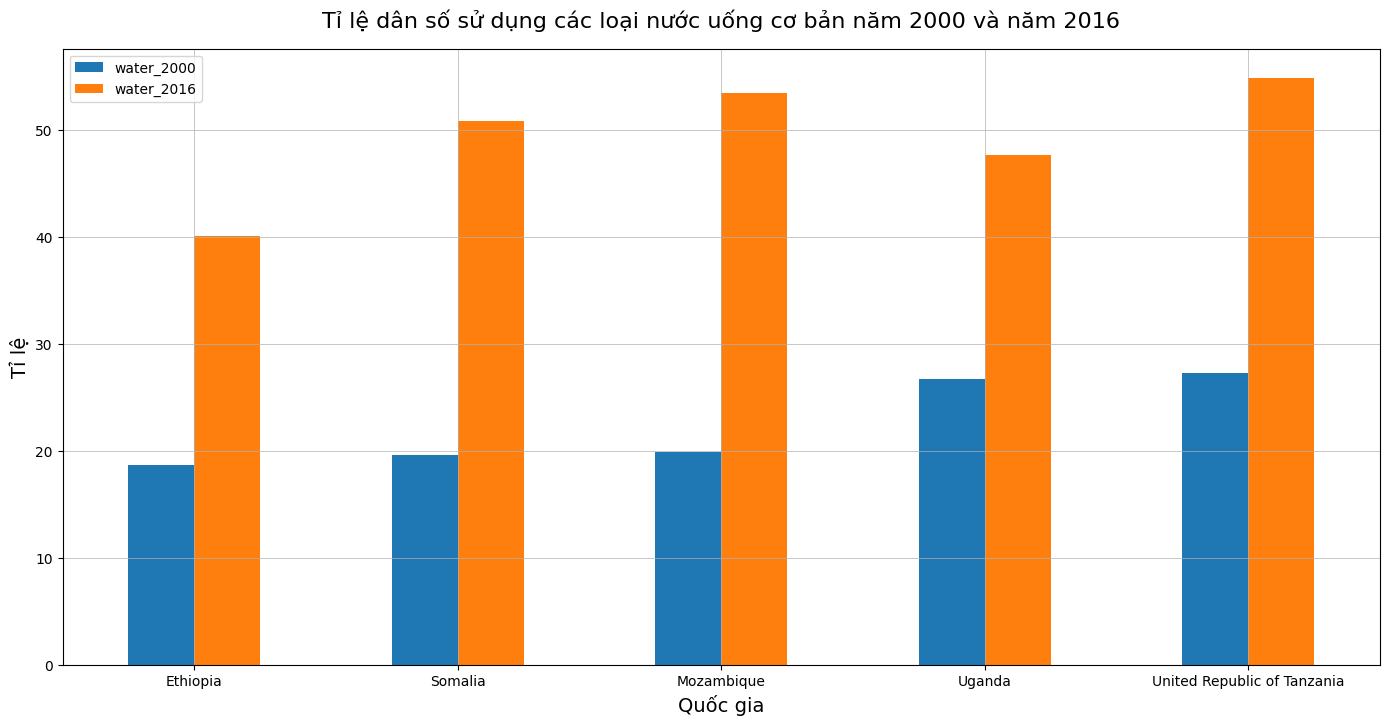

In [9]:
ax = water_df[:5].plot.bar(y=['water_2000', 'water_2016'], rot=0, figsize=(17,8))
plt.grid(linestyle='-', linewidth=0.5)
plt.title('Tỉ lệ dân số sử dụng các loại nước uống cơ bản năm 2000 và năm 2016', pad=15, fontsize=16)
plt.xlabel('Quốc gia', fontsize=14)
plt.ylabel('Tỉ lệ', fontsize=14)
plt.show()

Kết quả thu được là một bảng dữ liệu về tỉ lệ tăng trưởng về sử dụng các loại nước uống cơ bản của dân số các quốc gia trong giai đoạn 2000 - 2016.
Ta thấy, tại các vùng khu vực Châu Phi, tỉ lệ này của các quốc gia có sự tăng trưởng mạnh từ đó cho thấy được các quốc gia ở  khu vực này đã có sự phát triển và tiếp cận thế giới. Đặt biệt là quốc gia "Mozambique" có sự tăng trưởng rõ rệt nhất, qua 17 năm tỉ lệ sử dụng các loại nước uống cơ bản ở quốc gia này tăng gần 169%.

### Câu 5: Xu hướng thay đổi về tuổi thọ trung bình ở các nước có mức thu nhập thấp, trung bình thấp, trung bình cao và cao trên thế giới khác nhau như thế nào?

- Xác định ngưỡng thu nhập cho mỗi mức độ: thấp, trung bình thấp, trung bình cao và cao.
- Lọc các nước thuộc từng mức độ thu nhập dựa trên ngưỡng đã đặt.
- Lọc dữ liệu để chỉ bao gồm các năm từ năm 2000 đến năm gần nhất có dữ liệu.
- Nhóm dữ liệu theo năm và tính tuổi thọ trung bình cho mỗi mức độ thu nhập.
- Sử dụng Matplotlib để vẽ biểu đồ đường, mỗi đường đại diện cho xu hướng thay đổi về tuổi thọ kỳ vọng của mỗi mức độ thu nhập. Điểm dữ liệu được ký hiệu bằng 'o', và chú thích (legend) hiển thị tên của mỗi đường. Trục x là năm, trục y là tuổi thọ trung bình.

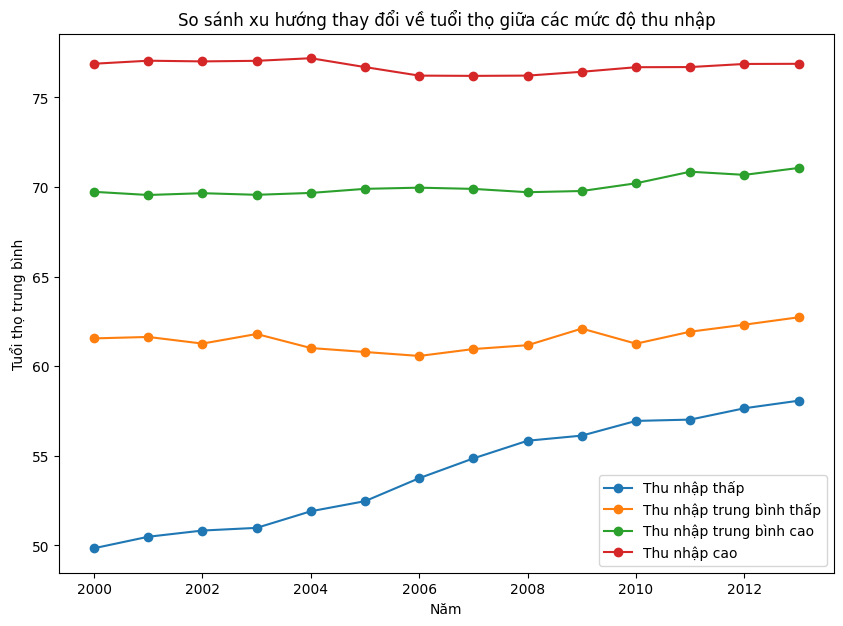

In [10]:
# Đặt ngưỡng thu nhập cho từng mức độ
low_income_threshold = 1045
low_middle_income_threshold = 4095
high_middle_income_threshold = 12695

# Chọn nước thuộc từng mức độ thu nhập
low_income_countries = df[df['gni_capita'] <= low_income_threshold]
low_middle_income_countries = df[(df['gni_capita'] > low_income_threshold) & (df['gni_capita'] <= low_middle_income_threshold)]
high_middle_income_countries = df[(df['gni_capita'] > low_middle_income_threshold) & (df['gni_capita'] <= high_middle_income_threshold)]
high_income_countries = df[df['gni_capita'] > high_middle_income_threshold]

# Lọc dữ liệu các năm 2000 - 2016
years = df[df['year'] >= df['year'].max()]

# Nhóm dữ liệu theo năm và tính tuổi thọ kỳ vọng trung bình cho từng mức độ thu nhập
avg_life_expect_low_income = low_income_countries.groupby('year')['life_expect'].mean()
avg_life_expect_low_middle_income = low_middle_income_countries.groupby('year')['life_expect'].mean()
avg_life_expect_high_middle_income = high_middle_income_countries.groupby('year')['life_expect'].mean()
avg_life_expect_high_income = high_income_countries.groupby('year')['life_expect'].mean()

# Vẽ biểu đồ so sánh xu hướng
plt.figure(figsize=(10, 7))

plt.plot(avg_life_expect_low_income.index, avg_life_expect_low_income, label='Thu nhập thấp', marker='o')
plt.plot(avg_life_expect_low_middle_income.index, avg_life_expect_low_middle_income, label='Thu nhập trung bình thấp', marker='o')
plt.plot(avg_life_expect_high_middle_income.index, avg_life_expect_high_middle_income, label='Thu nhập trung bình cao', marker='o')
plt.plot(avg_life_expect_high_income.index, avg_life_expect_high_income, label='Thu nhập cao', marker='o')

plt.xlabel('Năm')
plt.ylabel('Tuổi thọ trung bình')
plt.title('So sánh xu hướng thay đổi về tuổi thọ giữa các mức độ thu nhập')
plt.legend()
plt.show()

Dựa vào kết luận ta có một số kết luận sau:
 - Nhìn chung, tuổi thọ trung bình ở các quốc gia có thu nhập tốt hơn thì nằm cao hơn so với các nước có thu nhập thấp hơn. Điều này cho thấy chất lượng cuộc sống và hệ thống y tế ảnh hưởng lớn đến tuổi thọ.
    - Ở các quốc gia có mức thu nhập cao thì tuổi thọ trung bình cũng cao nhất, luôn nằm trên mức 75 tuổi và cũng có xu hướng ổn định qua các năm.
    - Đối với các quốc gia có mức thu nhập trung bình cao thì luôn có xu hướng tăng tuổi thọ trung bình nhẹ, mức tăng từ 70 lên đến 73. Mức tăng này vẫn thấp hơn so với các nước có mức thu nhập cao
    - Các quốc gia thu nhập trung bình thấp thì tuổi thọ trung bình tăng giảm không đồng đều, có những năm tăng và cũng có những năm giảm, chỉ dao động ổn định quanh mức 60 - 64 tuổi.
    - Đối với các quốc gia thu nhập thấp, tuổi thọ trung bình tăng nhanh nhất trong 4 nhóm các quốc gia, tăng mạnh từ mức 50 đến gần 60 tuổi.
- Biểu đồ cho thấy tuổi thọ trung bình ở các nước thu nhập cao và trung bình cao có xu hướng ổn định qua các năm, còn với các nước thu nhập thấp và trung bình thấp có xu hướng tăng nhưng vẫn nằm ở mức thấp so với hai nhóm nước còn lại.

### Câu 6: Số bác sĩ và số lượng bệnh viện có ảnh hưởng như thế nào đến tuổi thọ trung bình ở các quốc gia?

Để trả lời cho câu hỏi trên ta phải thực hiện các bước sau:
- Tạo dataframe mới chứa các cột dữ liệu cần xử lí
- Vẽ biểu đồ phân tán
- Tính toán ma trận tương quan và vẽ biểu đồ heatmap để chỉ ra mức độ tương quan giữa các giá trị dữ liệu

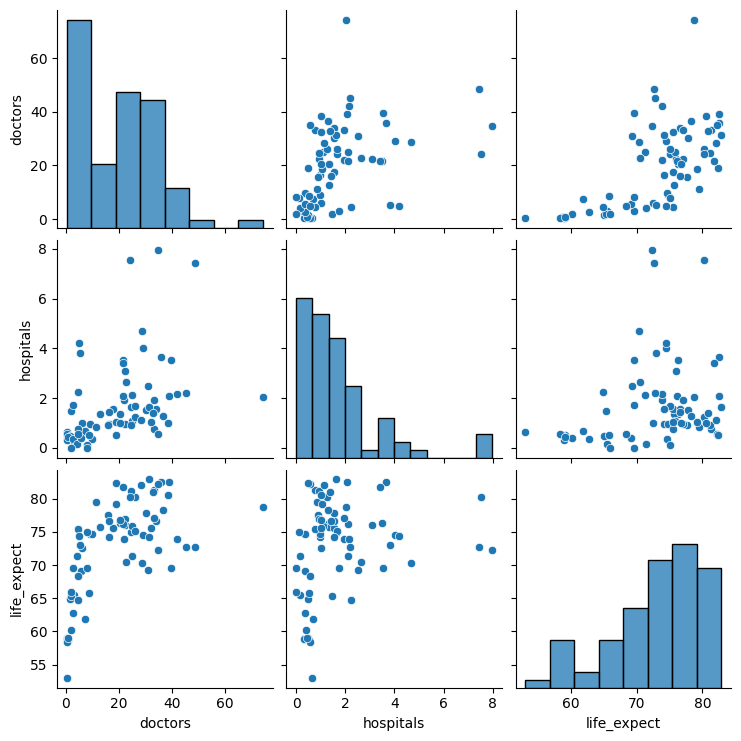

In [11]:
# Tạo DataFrame mới và loại bỏ những giá trị Nan
df_health = df[['doctors', 'hospitals', 'life_expect']].dropna()

# Vẽ biểu đồ phân tán
sns.pairplot(df_health)
plt.show()

Từ biểu đồ trên ta có thể thấy:
- Số lượng bệnh viện ảnh hưởng không đáng kể đến tuổi thọ trung bình
- Số lượng bác sĩ có ảnh hưởng đến tuổi thọ trung bình vì số lượng bác sĩ càng lớn cho thấy sự quan tâm đến y tế của quốc gia càng lớn
- Tuy nhiên, từ biểu đồ ta chưa thể xác định rõ được liệu số lượng các sĩ có ảnh hưởng mật thiết đến tuổi thọ trung bình hay không ta sẽ xem xét sự thay đổi của số lượng bác sĩ và tuổi thọ trung bình ở các châu lục qua từng năm để xác định

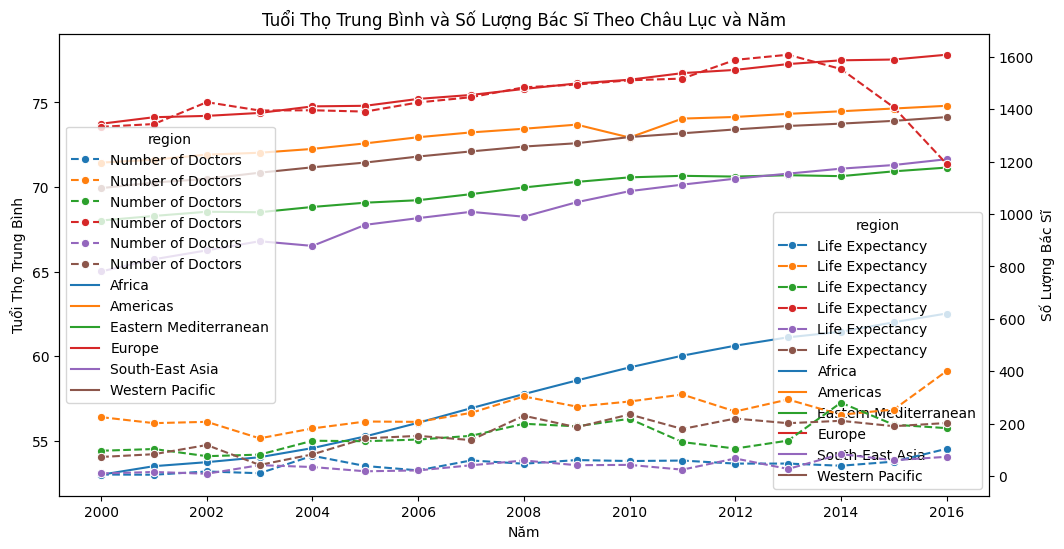

In [12]:
# Groupby theo châu lục và năm, tính trung bình tuổi thọ và số lượng bác sĩ
grouped_df = df.groupby(['region', 'year']).agg({'life_expect': 'mean', 'doctors': 'sum'}).reset_index()

# Vẽ biểu đồ line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='life_expect', hue='region', data=grouped_df, marker='o', label='Life Expectancy')
plt.title('Tuổi Thọ Trung Bình và Số Lượng Bác Sĩ Theo Châu Lục và Năm')
plt.xlabel('Năm')
plt.ylabel('Tuổi Thọ Trung Bình')

# Sử dụng trục phụ để vẽ số lượng bác sĩ
ax2 = plt.gca().twinx()
sns.lineplot(x='year', y='doctors', hue='region', data=grouped_df, marker='o', linestyle='--', label='Number of Doctors', ax=ax2)
ax2.set_ylabel('Số Lượng Bác Sĩ')

plt.show()

Dựa vào đồ thị trên ta có thể thấy được:
- Ở một số thời điểm số lượng bác sĩ và tuổi thọ trung bình có sự thay đổi không giống nhau (Châu Âu từ 2013-2016) nhưng nhìn chung thì tỉ lệ bác sĩ tăng thì tỉ lệ tuổi thọ trung bình tăng
- Số lượng bác sĩ tăng có dẫn tới sự tăng của tuổi thọ trung bình theo thời gian
- Số lượng bác sĩ có ảnh hưởng tới độ tăng của tuổi thọ trung bình, tuy nhiên độ tăng ở tuổi thọ trung bình nhanh hơn số lượng bác sĩ. Vì thế, sự gia tăng tuổi thọ trung bình còn phụ thuộc vào nhiều yếu tố khác nhau.